In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid', palette=sns.color_palette('bright6'))
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
ds = pd.read_csv('../assets/pokemon.csv')

In [4]:
ds.shape

(1007, 24)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pokemon_id                    1007 non-null   int64  
 1   pokemon_name                  1007 non-null   object 
 2   base_attack                   1007 non-null   int64  
 3   base_defense                  1007 non-null   int64  
 4   base_stamina                  1007 non-null   int64  
 5   type                          1007 non-null   object 
 6   rarity                        1007 non-null   object 
 7   charged_moves                 1007 non-null   object 
 8   fast_moves                    1007 non-null   object 
 9   candy_required                471 non-null    float64
 10  distance                      1007 non-null   int64  
 11  max_cp                        1007 non-null   int64  
 12  attack_probability            904 non-null    float64
 13  bas

In [6]:
ds.candy_required.unique()

array([ nan,  25., 100.,  12.,  50., 400., 200.])

In [7]:
ds.found_egg.unique()

array([True, False, nan], dtype=object)

In [8]:
ds.found_evolution.unique()

array([False, True, nan], dtype=object)

In [9]:
ds.found_wild.unique()

array([True, False, nan], dtype=object)

In [10]:
ds.found_research.unique()

array([True, False, nan], dtype=object)

In [11]:
ds.found_raid.unique()

array([True, False, nan], dtype=object)

In [12]:
ds.found_photobomb.unique()

array([True, False, nan], dtype=object)

In [13]:
ds.candy_required = ds.candy_required.fillna(0)
ds.found_egg = ds.found_egg.fillna(False)
ds.found_evolution = ds.found_evolution.fillna(False)
ds.found_wild = ds.found_wild.fillna(False)
ds.found_research = ds.found_research.fillna(False)
ds.found_raid = ds.found_raid.fillna(False)
ds.found_photobomb = ds.found_photobomb.fillna(False)

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pokemon_id                    1007 non-null   int64  
 1   pokemon_name                  1007 non-null   object 
 2   base_attack                   1007 non-null   int64  
 3   base_defense                  1007 non-null   int64  
 4   base_stamina                  1007 non-null   int64  
 5   type                          1007 non-null   object 
 6   rarity                        1007 non-null   object 
 7   charged_moves                 1007 non-null   object 
 8   fast_moves                    1007 non-null   object 
 9   candy_required                1007 non-null   float64
 10  distance                      1007 non-null   int64  
 11  max_cp                        1007 non-null   int64  
 12  attack_probability            904 non-null    float64
 13  bas

In [15]:
ds.attack_probability.unique()

array([0.1 , 0.2 , 0.4 , 0.3 , 0.05, 0.12, 0.15, 0.  , 0.01, 0.7 , 0.5 ,
       0.45, 0.25, 0.6 , 0.35, 0.13,  nan])

In [16]:
ds.base_capture_rate.unique()

array([-1., nan])

In [17]:
ds.base_flee_rate.unique()

array([-1., nan])

In [18]:
ds.dodge_probability.unique()

array([0.15, 0.  , 0.2 , 0.3 , 0.1 , 0.05, 1.  , 0.25, 0.4 , 0.02, 0.45,
       0.35,  nan])

In [19]:
ds.max_pokemon_action_frequency.unique()

array([1.6, 2.5, nan])

In [20]:
ds.min_pokemon_action_frequency.unique()

array([0.2 , 0.9 , 1.1 , 0.75,  nan])

In [21]:
ds.attack_probability = ds.attack_probability.fillna(0)


In [ ]:
ds.base_capture_rate = ds.base_capture_rate.fillna(False)
ds.found_evolution = ds.found_evolution.fillna(False)
ds.found_wild = ds.found_wild.fillna(False)
ds.found_research = ds.found_research.fillna(False)
ds.found_raid = ds.found_raid.fillna(False)
ds.found_photobomb = ds.found_photobomb.fillna(False)

In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pokemon_id                    1007 non-null   int64  
 1   pokemon_name                  1007 non-null   object 
 2   base_attack                   1007 non-null   int64  
 3   base_defense                  1007 non-null   int64  
 4   base_stamina                  1007 non-null   int64  
 5   type                          1007 non-null   object 
 6   rarity                        1007 non-null   object 
 7   charged_moves                 1007 non-null   object 
 8   fast_moves                    1007 non-null   object 
 9   candy_required                1007 non-null   float64
 10  distance                      1007 non-null   int64  
 11  max_cp                        1007 non-null   int64  
 12  attack_probability            1007 non-null   float64
 13  bas

In [5]:
ds.describe()

,pokemon_id,base_attack,base_defense,base_stamina,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency
count,1007.000000,1007.000000,1007.000000,1007.000000,471.000000,1007.000000,1007.000000,904.000000,904.0,904.0,904.000000,904.000000,904.000000
mean,504.105263,166.268123,143.824230,171.078451,65.995754,5.058590,2309.782522,0.140951,-1.0,-1.0,0.159093,1.600996,0.204701
std,291.003489,59.382689,52.023124,47.956251,61.598321,5.458459,1118.813651,0.090397,0.0,0.0,0.062609,0.029934,0.058141
min,1.000000,0.000000,0.000000,0.000000,12.000000,1.000000,16.000000,0.000000,-1.0,-1.0,0.000000,1.600000,0.200000
25%,252.500000,119.000000,103.000000,137.000000,25.000000,3.000000,1306.000000,0.100000,-1.0,-1.0,0.150000,1.600000,0.200000
50%,504.000000,165.000000,142.000000,167.000000,50.000000,3.000000,2304.000000,0.100000,-1.0,-1.0,0.150000,1.600000,0.200000
75%,755.500000,211.000000,179.000000,193.000000,100.000000,5.000000,3138.000000,0.200000,-1.0,-1.0,0.150000,1.600000,0.200000
max,1008.000000,414.000000,505.000000,496.000000,400.000000,20.000000,9366.000000,0.700000,-1.0,-1.0,1.000000,2.500000,1.100000


In [8]:
ds['rarity'].unique()

array(['Standard', 'Legendary', 'Mythic', 'Ultra beast'], dtype=object)

In [9]:
ds['rarity'].value_counts()

rarity
Standard       910
Legendary       64
Mythic          22
Ultra beast     11
Name: count, dtype: int64

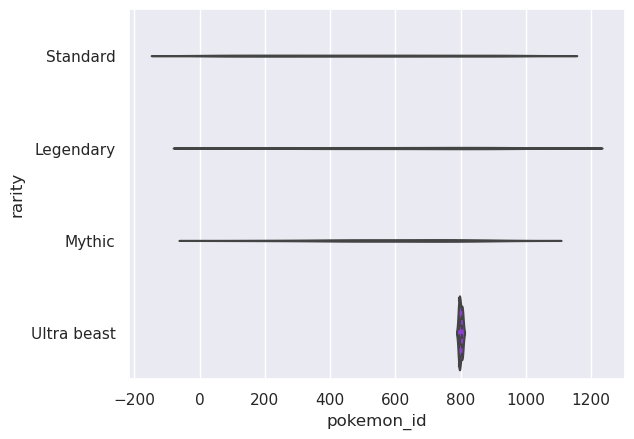

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [10]:
features = ds.drop(columns=['rarity', 'pokemon_id', 'pokemon_name'])

for f in ds.drop(columns=['rarity']).columns:
    sns.violinplot(y='rarity', x=f, data=ds, inner='quartile')
    plt.show()